# Sigmoid Neuron - Intermediate

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hemendrarajawat/World-With-Deep-Learning/blob/master/Sigmoid%20Neuron%20-%20Intermediate.ipynb)

In the last module, we got familiar with the Sigmoid Function. We also learned to plot the 2D and 3D graphs of Sigmoid Function. In this module we will go little bit depper to see the practical significance of Sigmoid Neuron Model.

\
When we train any model, we always focus to minimize the loss as much as possible. Loss can be calculate by the below formula:


$\large Loss = \sum{(y_{pred} - y_{actual})^2}$

\
To understand this better let's take an example. Suppose, someone have gave you 10 data samples from their datasets to train your model and after that they provide you 5 more data sample to predict their output.

\
Training Data:

| X    | Y   |
|:------:|:-------:|
|-2.80984199 | 0.14185106|
|-1.25936092 | 0.26405461|
|3.95262392 | 0.82849523|
|-8.79549057 | 0.00820315|
|3.33533431 | 0.77988563|
|3.41275739 | 0.78667527|
|-5.79234878 | 0.03574312|
|-7.42147405 | 0.01614291|
|-3.69143298 | 0.09578163|
|-2.72578458 | 0.14679034|

\
Evaluation Data:

| X    | Y   |
|:------:|:-------:|
|1.40393541 | 0.57444252|
|-1.22796973 | 0.26697985|
|9.76747676 | 0.98879359|
|-7.95910379 | 0.01243165|
|-5.82246488 |0.03522972|

\
As the w(weight associated to x) and b parameters are unknown to us, we can plot the Loss over a range of w and b for the same training data samples. We know that loss will be minimum if the w($w_{est}$) and b($b_{est}$) value we estimated are equal to the real w($w_{real}$) and b($b_{real}$) value. So, after calculating the loss for every possible value of w and b in a range, we can determine the $w_{real}$ and $b_{real}$ by finding the value of w($w_{est}$) and b($b_{est}$) where loss in minimum.


## Plotting Loss

### Import Libaries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from mpl_toolkits import mplot3d
from sklearn.metrics import mean_squared_error
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline

### Visualize the provided training data sets

In [0]:
X_train = np.array([-2.80984199, -1.25936092,  3.95262392, -8.79549057,  3.33533431, 
                    3.41275739, -5.79234878, -7.42147405, -3.69143298, -2.72578458])

Y_train = np.array([0.14185106, 0.26405461, 0.82849523, 0.00820315, 0.77988563, 
                    0.78667527, 0.03574312, 0.01614291, 0.09578163, 0.14679034])

X_eval = np.array([1.40393541, -1.22796973,  9.76747676, -7.95910379, -5.82246488])

Y_eval = np.array([0.57444252, 0.26697985, 0.98879359, 0.01243165, 0.03522972])

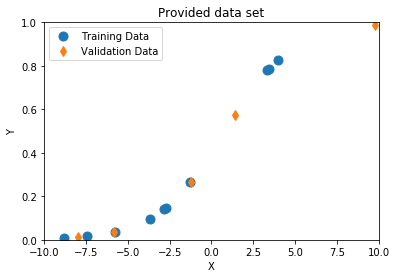

In [3]:
plt.plot(X_train, Y_train, 'o', markersize=9)
plt.plot(X_eval, Y_eval, 'd', markersize=7)
plt.title('Provided data set')
plt.legend(('Training Data', 'Validation Data'))
plt.xlim(-10, 10)
plt.ylim(0, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Calculate Loss

In [0]:
def sigmoid(x, w, b):
  return 1 / (1 + np.exp(-(w*x + b)))

In [0]:
def loss(X, Y, w, b):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w, b))**2
    
  return loss

In [0]:
W = np.linspace(-1, 1, 100)
B = np.linspace(-1, 1, 100)

WW, BB = np.meshgrid(W, B)

In [0]:
Loss = np.zeros(WW.shape)
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = loss(X_train, Y_train, WW[i,j], BB[i,j])

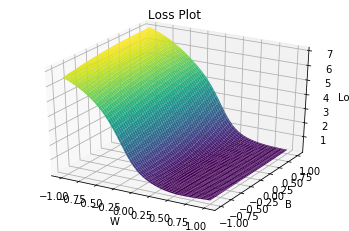

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_title('Loss Plot')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')
plt.show()

As the  loss below -0.50 is large, we will modify our range accordingly to see the loss plot better.

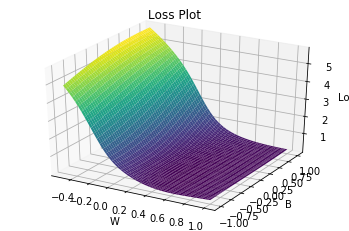

In [9]:
W = np.linspace(-0.5, 1, 300) # Modified the range and no of points are also increased for better accuracy
B = np.linspace(-1, 1, 300)     # No of points are increased for better accuracy

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = loss(X_train, Y_train, WW[i,j], BB[i,j])
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_title('Loss Plot')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')
plt.show()

### Find the $w_{est}$ and $b_{est}$

In [10]:
ij = np.argmin(Loss)

i = int(ij/WW.shape[1])
j = int(ij - i * WW.shape[1])

w_est = WW[i,j]
b_est = BB[i,j]

print('w=', w_est)
print('b=', b_est)

w= 0.4983277591973244
b= -0.39799331103678925


### Evaluation of w and b values

In [11]:
Y_pred = sigmoid(X_eval, w_est, b_est)
print(Y_pred)

mse = mean_squared_error(Y_pred, Y_eval)
rmse = sqrt(mse)

print('MS Error:', mse)
print("RMS Error:", rmse)

[0.57484012 0.26699458 0.98867566 0.0125645  0.03558872]
MS Error: 6.374850751344091e-08
RMS Error: 0.00025248466787795436


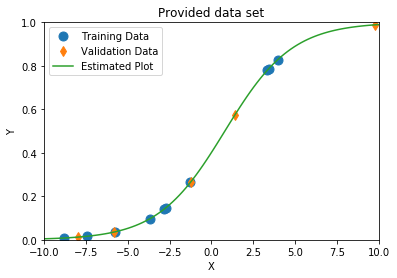

In [12]:
X = np.linspace(-10, 10, 100)
Y = sigmoid(X, w_est, b_est)

plt.plot(X_train, Y_train, 'o', markersize=9)
plt.plot(X_eval, Y_eval, 'd', markersize=7)
plt.plot(X, Y)
plt.title('Provided data set')
plt.legend(('Training Data', 'Validation Data', 'Estimated Plot'))
plt.xlim(-10, 10)
plt.ylim(0, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Conclusion and What's Next?

As the loss is very low(approx to zero) and the predicted value for validation samples are also very close, we can say that, 

$ w_{real} \approx w_{est} \approx 0.496$

and

$ b_{real} \approx b_{est} \approx -0.397$

\
Now, after the validation the person has told you that the real values of **w** and **b** were **0.5** and **-0.4** respectively.

\
This time there was only one feature(X) in the dataset, that's why we were able to visualize the loss plot and were able to find the w and b value from brute force search by calculating the loss with every possible value of w and b in a range. We took only a small range of w and b but in the real world data finding the values of W and b using brute force search is nearly impossible. 

So, In the next module, we will see the use of Sigmoid Neuron on Real Data Set using some better learning technique to find the values of w and b.